### Imports

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
#imports
import scipy.io
import os
import pandas
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
import obspy
import pywt
import pywt.data

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

### Load the trimmed data 

In [3]:
dir_path = "/Users/ecem/Desktop/seperate-axis"
z = np.load(dir_path + "/z-10sec.npy", allow_pickle= True)

In [4]:
z.shape

(2392, 2560)

## Let's look at wavelet decomposition for a signal piece

#### how our decomposition filter values look like

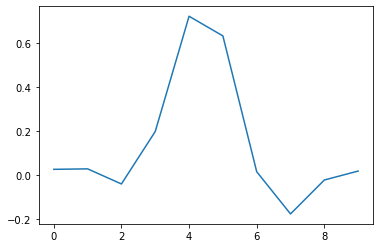

In [5]:
w = pywt.Wavelet('sym5')
plt.plot(w.dec_lo)
coeffs = pywt.wavedec(z[0], w, level=6)

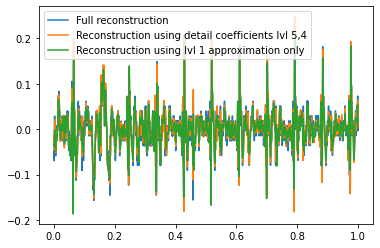

In [6]:
def reconstruction_plot(yyy, **kwargs):
    """Plot signal vector on x [0,1] independently of amount of values it contains."""
    plt.plot(np.linspace(0, 1, len(yyy)), yyy, **kwargs)

reconstruction_plot(pywt.waverec(coeffs, w)) # full reconstruction 
reconstruction_plot(pywt.waverec(coeffs[:-1] + [None] * 1, w)) # leaving out detail coefficients up to lvl 5
reconstruction_plot(pywt.waverec(coeffs[:-2] + [None] * 2, w)) # leaving out detail coefficients up to lvl 4
#reconstruction_plot(pywt.waverec(coeffs[:-3] + [None] * 3, w)) # leaving out detail coefficients up to lvl 3
#reconstruction_plot(pywt.waverec(coeffs[:-4] + [None] * 4, w)) # leaving out detail coefficients up to lvl 2
#reconstruction_plot(pywt.waverec(coeffs[:-5] + [None] * 5, w)) # leaving out detail coefficients up to lvl 1
#reconstruction_plot(pywt.waverec(coeffs[:-6] + [None] * 6, w)) # leaving out all detail coefficients = reconstruction using lvl1 approximation only
plt.legend(['Full reconstruction', 'Reconstruction using detail coefficients lvl 5,4', 'Reconstruction using lvl 1 approximation only'])

Amplitude of the coefficient corresponds to amplitude with which the wavelet occurs in the signal (y axis), and position of the coefficient corresponds to the time (x axis). 

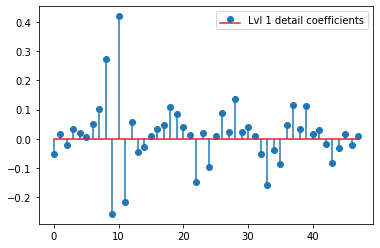

In [7]:
plt.stem(coeffs[1]); plt.legend(['Lvl 1 detail coefficients'])

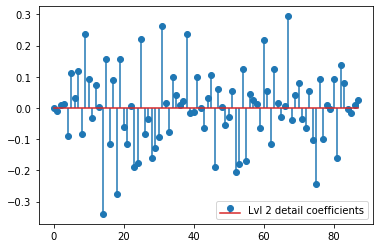

In [8]:
plt.stem(coeffs[2]); plt.legend(['Lvl 2 detail coefficients'])


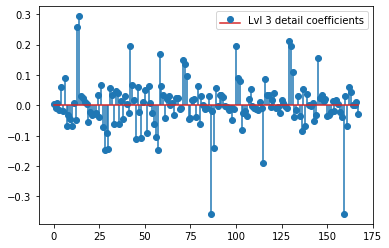

In [9]:
plt.stem(coeffs[3]); plt.legend(['Lvl 3 detail coefficients'])


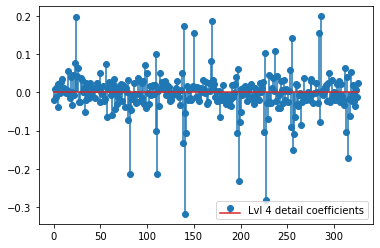

In [10]:
plt.stem(coeffs[4]); plt.legend(['Lvl 4 detail coefficients'])


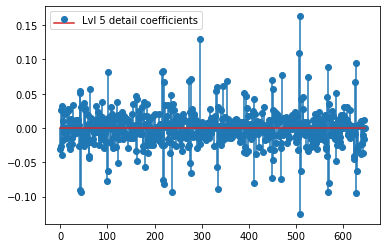

In [11]:
plt.stem(coeffs[5]); plt.legend(['Lvl 5 detail coefficients'])


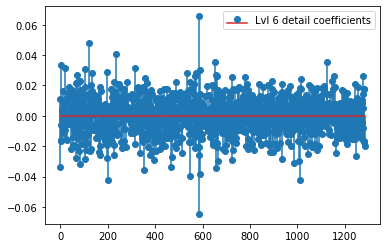

In [12]:
plt.stem(coeffs[6]); plt.legend(['Lvl 6 detail coefficients'])

In [13]:
# Reconstruction of signal using just lvl1 approximation
approx_lvl1 = pywt.waverec(coeffs[:-6] + [None] * 6, w)
# interpolate to original amount of samples (necessary due to numeric solution of transformation not yielding same amount of values)
approx_lvl1_interp = np.interp(x=np.arange(0, len(z[0])), xp=np.linspace(0, 525, len(approx_lvl1)), fp=approx_lvl1)
z_without_lvl1approx = z[0] - approx_lvl1_interp

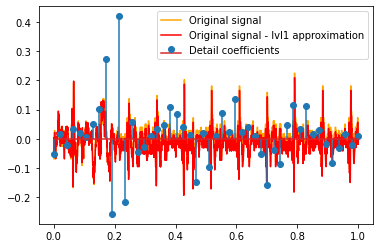

In [14]:
def reconstruction_stem(yyy, **kwargs):
    """Plot coefficient vector on x [0,1] independently of amount of values it contains."""
    plt.stem(np.linspace(0, 1, len(yyy)), yyy, **kwargs)

reconstruction_plot(z[0], color='orange')
reconstruction_plot(z_without_lvl1approx, color='red')
reconstruction_stem(coeffs[1])
plt.legend(['Original signal', 'Original signal - lvl1 approximation', 'Detail coefficients'])

### Now let's get coef for all pieces

In [15]:
coef_diseased_z = []
for i in range(len(z)):
    coef_diseased_z.append(pywt.wavedec(z[i], w, level=6))

In [16]:
import pandas as pd

In [17]:
z_w = np.array(coef_diseased_z)

In [18]:
z_w.shape

(2392, 7)

### Level by level

In [19]:
def level_coef_extractor_3d(array, lvl = 0):
    
    lenn = array[0][lvl].shape[0] #48
    coef = np.ones(shape = ( array.shape[0],lenn)) #2392,48
    
    for i in range(array.shape[0]):
        coef[i,:] = array[i][lvl]
        
    return coef

In [20]:
def saver(array = 0, lvl = 0, dir_path = None, name = 'blank'):
    coefs = level_coef_extractor_3d(array, lvl)
    np.save(dir_path + "/"+ str(name) + "_lvl_"  + str(lvl), coefs, allow_pickle = True)
    del coefs

In [21]:
saver(z_w, 0, dir_path, 'z-axis-wavelet')


In [22]:
z_w.shape

(2392, 7)

In [23]:
z_w[0][1].shape

(48,)

In [24]:
d= np.load(dir_path+ "/z-axis-wavelet_lvl_0.npy",  allow_pickle = True)

In [25]:
d.shape

(2392, 48)

In [26]:
d[0]

array([-2.56722017e-01, -2.62204077e-01, -2.37596242e-01, -1.66560183e-01,
        1.18018640e-01, -6.92870233e-02, -1.55032730e-01,  4.27846008e-02,
       -1.08241357e-01,  8.31636776e-03,  1.88300406e-01, -2.03329155e-01,
       -2.12485413e-03, -5.67472278e-05, -5.57468259e-02,  1.12668406e-02,
       -4.72978806e-02, -1.28356641e-02,  3.80079915e-02,  2.77613210e-02,
       -6.18093370e-02, -7.57407891e-02, -2.90483232e-02,  5.67439252e-02,
        7.80989175e-03, -2.59980146e-02,  5.20433553e-02, -4.23051838e-02,
        1.57390515e-02, -1.23220559e-02,  9.07853466e-02, -1.85083718e-02,
        5.15700356e-02, -3.00134971e-02, -8.01163831e-02,  6.35148962e-02,
       -1.09740712e-03,  2.28018106e-02, -4.80271993e-03, -9.97510200e-03,
       -1.32966041e-02,  3.15061296e-02,  3.46597306e-02,  1.21151962e-01,
        1.58908577e-01,  1.28339193e-01,  1.34331610e-01,  1.49061979e-01])

In [27]:
d[10]

array([ 5.95008156e-01,  6.92157910e-01,  6.36343535e-01,  3.62825174e-01,
       -1.87761263e-01,  4.15431039e-02, -6.00771102e-02,  1.81435210e-03,
       -1.61603447e-02,  1.43901829e-02, -1.65848835e-03, -4.57856052e-02,
       -7.78386153e-02,  1.89571508e-02, -3.14779556e-02,  3.02937451e-02,
       -1.95583676e-02,  1.36498283e-02,  3.55953623e-03, -3.44366306e-02,
       -6.17076461e-04, -2.76438508e-03, -1.44520607e-02, -1.00178581e-01,
       -5.20907238e-02,  4.77627839e-02, -2.11494204e-02,  8.03415765e-03,
       -2.74661999e-02,  3.13249703e-02, -2.22931891e-02,  2.68926968e-02,
       -2.61019559e-02, -1.34078568e-01,  1.68268927e-02, -4.91264618e-02,
        7.23316249e-02, -3.92015161e-02,  2.94860507e-03, -2.79560429e-02,
        2.49234863e-02,  1.39184710e-02, -1.10158070e-02, -6.51946107e-02,
       -1.58625394e-01, -1.37041524e-01, -1.33847470e-01, -1.34218922e-01])

### Check whether each data saved correctly

In [28]:
def column_namer(level = 0, lenght = 48):
    x = []
    for i in range(lenght):
        x.append("lvl{0}_x{1}".format(level, i))
    
    return x 

In [29]:
import pandas as pd

In [30]:
def dataframe_checker(path, name = "z-axis-wavelet", df = pd.DataFrame(), level = 0):

    values  = []

    array = np.load(path + "/" + name + "_lvl_{}.npy".format(level), allow_pickle = True)
    columns = column_namer(level = level, lenght = array.shape[1])
    
    for i in range(array.shape[0]):
        values.append(array[i].tolist()) 

        medium = pd.DataFrame([values[i]], columns = columns)
        
        df = pd.concat([df, medium], axis = 0)
        
    
    return df

In [31]:
df = dataframe_checker(dir_path,  "z-axis-wavelet", level = 0 )
df

,lvl0_x0,lvl0_x1,lvl0_x2,lvl0_x3,lvl0_x4,lvl0_x5,lvl0_x6,lvl0_x7,lvl0_x8,lvl0_x9,...,lvl0_x38,lvl0_x39,lvl0_x40,lvl0_x41,lvl0_x42,lvl0_x43,lvl0_x44,lvl0_x45,lvl0_x46,lvl0_x47
0,-0.256722,-0.262204,-0.237596,-0.166560,0.118019,-0.069287,-0.155033,0.042785,-0.108241,0.008316,...,-0.004803,-0.009975,-0.013297,0.031506,0.034660,0.121152,0.158909,0.128339,0.134332,0.149062
0,0.014972,0.040005,0.038700,0.005098,0.031481,-0.127984,-0.005841,0.004107,0.016430,-0.032817,...,-0.056027,-0.044484,-0.025730,0.040819,-0.007631,-0.004883,-0.056402,-0.067213,-0.057641,-0.039950
0,-0.167456,-0.164667,-0.151657,-0.126887,0.020662,-0.036075,0.031803,-0.001116,0.060653,-0.047655,...,0.017353,0.029110,0.004084,-0.041428,-0.044852,-0.034972,0.053526,0.039660,0.035398,0.031143
0,0.063490,0.053226,0.051552,0.055396,0.005145,0.046214,-0.020041,0.022265,0.018234,0.007440,...,0.052188,-0.078633,-0.044265,-0.024217,-0.029692,0.051737,0.043672,0.048377,0.047015,0.038573
0,0.002953,0.012022,0.009727,-0.001503,-0.000890,-0.000854,0.035964,-0.034045,0.022361,-0.079904,...,-0.014478,0.017597,-0.019702,-0.037006,0.019880,0.066369,0.091973,0.078102,0.079841,0.083903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,-0.153077,-0.179271,-0.161151,-0.074929,0.121072,0.049654,0.051514,0.026678,-0.001160,0.004666,...,0.014821,0.009703,0.038727,0.016893,0.051154,0.023889,0.014518,0.018233,0.018315,0.018180
0,0.043435,0.041863,0.039384,0.031868,-0.009107,0.017145,-0.041242,-0.003334,-0.029420,-0.046165,...,0.006079,-0.028282,-0.056236,-0.020658,-0.042306,-0.025261,0.045890,0.026822,0.025429,0.030637
0,-0.020089,-0.015748,-0.019534,-0.031995,-0.065577,-0.059317,-0.051373,-0.009970,-0.037927,0.022646,...,-0.026788,-0.088121,-0.051529,-0.048913,-0.070555,-0.049824,-0.080925,-0.069791,-0.070239,-0.077539
0,-0.137541,-0.163550,-0.152205,-0.096160,-0.010666,0.000189,0.027463,0.047168,0.085675,0.055591,...,-0.055060,-0.042704,-0.035764,-0.022767,0.005606,0.042350,0.034094,0.036432,0.035644,0.033274


In [32]:
df.to_csv(dir_path + '/z-axis-wavelet_lvl_0.csv')